### Дерево отрезков.  

#### Введение. 


Дан список $a$, состоящий из $n$ элементов.  
Мы умеем за $O(1)$ решать задачу с одним видом запросов - нахождение суммы элементов массива на отрезке $[l,r]$, используя при этом дополнительную структуру - массив префиксных сумм, который построили за $O(n)$.

Добавим второй вид запросов - изменение значения элемента массива $a$ в позиции $pos$.  
После каждого такого запроса необходимо пересчитывать массив префиксных сумм.  
Вычислительная сложность решения станет равной $O(n \cdot m)$, где $m$ - количество запросов второго типа.

Итак, имеем задачу, в которой нужно обрабатывать 2 вида запросов:  
  
1. $set(pos, x)$ - выполнить присвоение $a[pos] = x$;  
2. $sum(l, r)$ - найти сумму всех элементов массива на отрезке $[l,r]$;

Научимся решать эту задачу быстрее с помщью структуры данных ***дерево отрезков***.

***Дерево отрезков (ДО)***  - это мощная структура данных, позволяющая быстро, за время $O(log \, n)$ на один запрос, обрабатывать запросы на отрезках в массиве. 

#### Описание структуры.  
  
  ***Дерево отрезков*** представляет из себя ***бинарное дерево***, каждой вершине которого соответствует определенный отрезок $[l; r]$ массива $a$.  
Если вершине $v$ соответствует отрезок, у которого $l = r$, то такая вершина называется листом дерева.  
В противном же случае у вершины $v$ есть два сына:  
+ вершина с номером $2 \cdot v$, которой соответствует отрезок $[l; mid]$, где $mid = \left \lfloor \frac{l + r}{2} \right \rfloor$);  
+ вершина с номером $2 \cdot v + 1$, которой соответствует отрезок $[mid + 1; r]$.  

Корнем дерева является вершина номер $1$, которой соответствует весь массив - отрезок $[0; n - 1]$.


Для лучшего понимания посмотрим, как выглядит ДО при $n = 8$.


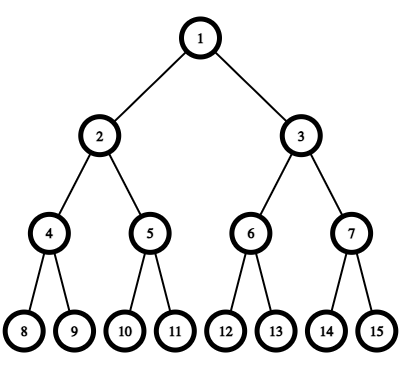


|          |         |          | $v_1$ -> | [0;7]  |          |          |          |
|----------|---------|----------|----------|----------|----------|----------|----------|
|  $v_2$ ->   | [0;3]   |          |          | $v_3$ ->    | [4;7]    |          |          |
| $v_4$ ->   | [0;1]   | $v_5$ ->    | [2;3]    | $v_6$ ->    | [4;5]    | $v_7$ ->    | [6;7]    |
| $v_8$ ->[0] |$v_9$ -> [1]|$v_{10}$ ->[2] |$v_{11}$ ->[3]|$v_{12}$->$[4]$ | $v_{13}$->$[5]$ |$v_{14}$->[6] |$v_{15}$->$[7]$ |

Можно заметить, что ДО состоит из $log(n)$ уровней, на каждом из которых каждый элемент массива принадлежит ровно одной вершине.


В таблице ниже при $n = 8$ для каждого из $4$ уровней и каждого элемента массива указано, какой вершине он принадлежит.

|0  | 1 | 2  | 3  | 4  | 5  | 6  | 7  |
|---|---|----|----|----|----|----|----|
| 1 | 1 | 1  | 1  | 1  | 1  | 1  | 1  |
| 2 | 2 | 2  | 2  | 3  | 3  | 3  | 3  |
| 4 | 4 | 5  | 5  | 6  | 6  | 7  | 7  |
| 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 |

Для быстрого ответа на запросы, в каждой вершине ДО будет хранится сумма всех элементов, соответствующих заданной вершине.

Таким образом, все ДО можно описать одним массивом $tree\_sum[cnt\_vertices]$, где $tree\_sum[v]$ - сумма всех элементов массива, соответствующих вершине $v$.  
При этом $cnt\_vertices$ можно оценить как $1 + 2 + 4 + 8 + … + n \leq 4n$ (на первом уровне будет ровно $1$ вершина, на втором $2$, на третьем $4$, и т.д.).   
Поэтому достаточно завести массив $tree\_sum$ размером $4n$.


#### Задание №1.  
Выписать список всех вершин ДО для массива  

$a = [3, 5, 1, 2, 0, 9, 2, 1, 1, 4, 6]$  

Для каждой вершины указать ее номер, соответствующий ей отрезок, и сумму элементов на этом отрезке.


*Решение*

$v_1 \rightarrow [0, 10] \rightarrow sum[v_1] = 34$  
$v_2 \rightarrow [0, 5] \rightarrow sum[v_2] = 20$  
$v_3 \rightarrow [6, 10] \rightarrow sum[v_1] = 14$  
$v_4 \rightarrow [0, 2] \rightarrow sum[v_1] = 9$  
...................................................

#### Построение дерева отрезков.

#### Задание №2.  
Написать функцию   
$build(v, l, r)$  
которая, используя глобальный массив $a$, заполняет значения $tree\_sum[v]$.  
  
***Рекурсивная реализация (сверху вниз)***  
  
- из основного кода вызывать эту функцию нужно с параметрами $build(v=1, l=0, r=len(a) - 1)$.    
- затем делаем  два рекурсивных вызова  
  $build(2 \cdot v, l, mid)$  
  $build(2 \cdot v + 1, mid + 1, r)$  
   где $mid = \left \lfloor \frac{l + r}{2} \right \rfloor$  
- после чего находим значение $sum[v] = sum[2 \cdot v] + sum[2 \cdot v + 1]$  
- услове выхода из рекурсии:  
  если $l == r$, то $tree\_sum[v] = a[l]$

In [11]:
def build(v, l, r):
    if l == r:
        tree_sum[v] = a[l]
    else:
        mid = (l + r) // 2
        build(2 * v, l, mid)
        build(2 * v + 1, mid + 1, r)
        tree_sum[v] = tree_sum[2 * v] + tree_sum[2 * v + 1]


In [12]:
a = [3,5,1,2,0,9,2,1,1,4,6]
tree_sum = [0] * 4 * len(a)
build(1, 0, len(a) - 1)
print(tree_sum)

[0, 34, 20, 14, 9, 11, 4, 10, 8, 1, 2, 9, 3, 1, 4, 6, 3, 5, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


***Рекуррентная реализация (снизу вверх)***

При рекуррентной реализации важно, чтобы $n = 2^k$, так как мы будем пользоваться тем, что массив хранится в листах ДО, начиная с позиции $n$.   
Сначала заполняем дерево отрезков в листах, потом в вершинах с номерами от $n - 1$ до $1$.

In [20]:
def build2():
    for i in range(m, 2 * m):
        tree_sum_2[i] = b[i - m]
    for i in range(m - 1, 0, -1):
        tree_sum_2[i] = tree_sum_2[2 * i] + tree_sum_2[2 * i + 1]

In [22]:
b = [3, 5, 1, 2, 0, 9, 2, 1, 1, 4, 6, 0, 0, 0, 0, 0]
m = len(b)
tree_sum_2 = [0] * (2 * m)
build2()
print(tree_sum_2)

[0, 34, 23, 11, 11, 12, 11, 0, 8, 3, 9, 3, 5, 6, 0, 0, 3, 5, 1, 2, 0, 9, 2, 1, 1, 4, 6, 0, 0, 0, 0, 0]


#### Операция обновления (изменение в точке).   
Нетрудно заметить, что при изменении одного элемента массива $a$, изменится $O(log\, n)$ вершин дерева отрезков. Действительно, на каждом уровне ДО ровно одна вершина будет содержать наш элемент, а т.к. общее кол-во уровней - $O(log\,n)$, то и изменить нужно столько же значений в массиве $tree\_sum$.


Самый простой способ реализовать функцию обновления - это написать рекурсивную функцию $update(v, l, r, pos, x)$, которая обновит значение массива $tree\_sum$ в вершине $v$, которой соответствует отрезок $[l, r]$, а также значения массива $tree\_sum$ во всех сыновьях вершины $v$, которые содержат позицию $pos$.


#### Задание №3.  
  
Последовательно выполнить следующие запросы обновления:  
pos = 4, x = 5  
pos = 0, x = 8  
pos = 10, x = 2  
После каждого запроса обновления выписать состояние ДО и выделить цветом те вершины, значения в которых изменились.


#### Задание №4.   
***Рекурсивная (сверху)*** реализация функции $update(v, l, r, pos, x)$.  
  
- из основного кода функция вызывается с параметрами $update(1, 0, n - 1, pos, x)$  
- условие выхода из рекурсии (дошли до листа):  
  если $l == r$ то $tree\_sum[v] = x$  
- в зависимости от значения $mid = \left \lfloor \frac{l + r}{2} \right \rfloor$ вызываем функцию $update()$ для соответствующей вершины  
- пересчитываем значение ДО в вершине $v$.

In [ ]:
def update(v, l, r, pos, x):
    if l == r:
        tree_sum[v] = x
    else:
        mid = (l + r) // 2
        if pos <= mid:
            update(2 * v, l, mid, pos, x)
        else:
            update(2 * v + 1, mid + 1, r, pos, x)
        tree_sum[v] = tree_sum[2 * v] + tree_sum[2 * v + 1]

***Рекуррентная (снизу)*** реализация функции $update(v, l, r, pos, x)$.

Какие вершины нужно обновить? Вершину $pos + n$ и всех её предков.

In [ ]:
def update(pos, x):
    pos += n
    tree_sum_2[pos] = x
    while pos:
        pos //= 2
        tree_sum_2[pos] = tree_sum_2[2 * pos] + tree_sum_2[2 * pos + 1]
        

#### Операция нахождения суммы.

Главное свойство дерева отрезков, на котором и строятся все алгоритмы работы с ним: ***любой непрерывный отрезок в массиве из $n$ элементов можно представить с помощью около $2log \, n$ вершин в дереве отрезков***.

Например, отрезок $[1;11]$ в массиве длиной $13$ можно представить с помощью следующих вершин:

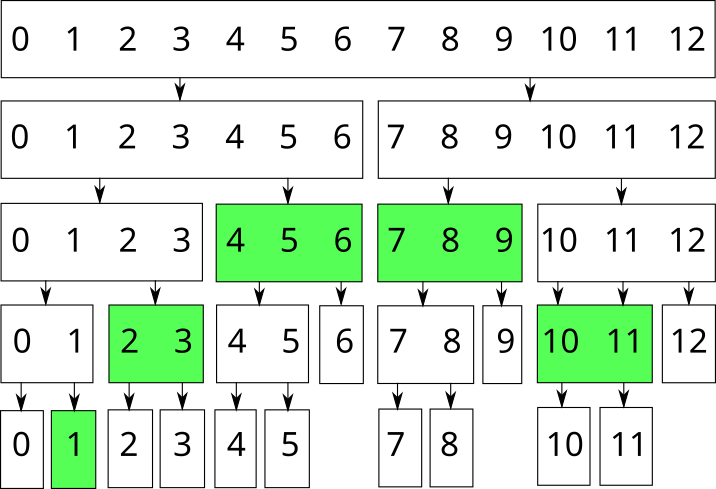

Можно заметить, что любой отрезок $[l; r]$ можно представить в виде объединения $O(log\, n)$ отрезков ДО, а значит и сумму на любом отрезке можно найти за $O(log\, n)$. Этот факт можно доказать конструктивным способом. Для этого сначала опишем рекурсивную функцию $get\_sum$.

Она будет принимать следующие параметры:   
$get\_sum(v, t_l, t_r, l, r)$  
где $v$ - текущая вершина, $[t_l, t_r]$ - отрезок, который ей соответствует, и $[l, r]$ - отрезок, на котором нужно найти сумму.


В самом начале функции нужно проверить, не совпадают ли отрезки $[t_l; t_r]$ и $[l; r]$.  
Если совпадают, то можно сразу вернуть результат - $sum[v]$.  
Иначе возможны $3$ случая:


- отрезок $[l, r]$ полностью попадает в отрезок $[t_l; mid]$ (левый сын текущей вершины $v$).  
  В этом случае нужно просто вернуть $get\_sum(2 \cdot v, t_l, mid, l, r)$;
- отрезок $[l, r]$ полностью попадает в отрезок $[mid + 1; t_r]$ (правый сын текущей вершины $v$).  
  Аналогично предыдущему случаю нужно просто вернуть $get\_sum(2 \cdot v + 1, mid, t_r, l, r)$;
- в противном случае наш отрезок частично содержится в обоих сыновьях текущей вершины:  
  отрезок $[l; mid]$ содержится в левом сыне, а $[mid + 1; tr]$ - в правом.  
  Это значит, что итоговая сумма будет равна  
    
    $get\_sum(2 \cdot v, t_l, mid, l, mid) + get\_sum(2 \cdot v + 1, mid + 1, t_r, mid + 1)$  
  
  
- из основной программы функция $get\_sum$ вызывается с параметрами $v = 1, l = 0, r = n - 1$       


Нетрудно понять, что данная функция посетит $O(log\, n)$ вершин ДО. Действительно, в первых двух случаях она просто перейдет на уровень ниже, а третий случай может выполниться максимум $1$ раз (т.к. в случае разделения нашего отрезка на два, каждый из них всегда будет либо префиксом, либо суффиксом отрезка вершины, а значит в случае еще одного разделения отрезка на $2$, хотя бы один из них полностью будет совпадать с отрезком вершины).

#### Задание №5.   
Записать вершины и соответствующие им отрезки, которые будут использоваться при следующих запросах подсчета суммы:  

$l = 0, r = 12$;  
$l = 0, r = 5$;  
$l = 4, r = 12$;  
$l = 3, r = 7$;  
$l = 5, r = 11$;


#### Задание №6.   
Реализовать рекурсивную функцию $get\_sum(v, tl, tr, l, r)$.

In [23]:
def get_sum(v, tl, tr, l, r):
    if tl == l and tr == r:
        return tree_sum[v]
    mid = (tl + tr) // 2
    if tl <= l <= r <= mid:
        return get_sum(2 * v, tl, mid, l, min(r, mid))
    elif mid + 1 <= l <= r <= tr:
        return get_sum(2 * v + 1, mid + 1, tr, max(l, mid + 1), r)
    else:
        return get_sum(2 * v, tl, mid, l, min(r, mid)) + \
               get_sum(2 * v + 1, mid + 1, tr, max(l, mid + 1), r)